In [111]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [112]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

In [132]:

xgrid, ygrid = torch.meshgrid(torch.arange(0, 20, 1.), torch.arange(0, 20, 1.))
grid = torch.cat((xgrid.flatten().unsqueeze(0), ygrid.flatten().unsqueeze(0)), dim=0)
grid.shape

torch.Size([2, 400])

In [148]:
crds0 = torch.rand((4, 2)) * 19
crds = crds0.clone()

In [149]:
crds = crds0.clone()

In [150]:
for i in range(3):
    crds = torch.cat((crds, crds0 + torch.normal(0.8, 0.8, (4, 2)) * torch.sign(torch.randint(-1, 1, (4,2)))) , dim=0)

In [205]:
crd_around = grid.T[torch.any(torch.cdist(grid.T, crds) < 1.5, dim=1)]
crd_around_idx = torch.nonzero(torch.any(torch.cdist(grid.T, crds) < 1.5, dim=1))
A = (torch.cdist(crd_around, crd_around, p=1) <= 1.0).double()

In [237]:
cdist_vals = torch.cdist(grid.T, crds)
mask_values = np.zeros(400)
crd_around_halo = grid.T[torch.any(cdist_vals < 2.8, dim=1)]
crd_around_halo_vals = torch.amin(cdist_vals, 1)[torch.any(cdist_vals < 2.8, dim=1)]
crd_around_halo_idx = torch.nonzero(torch.any(torch.cdist(grid.T, crds) < 2.8, dim=1))
# mask_values.shape, crd_around_halo_idx.shape
mask_values[crd_around_halo_idx[:, 0]] = crd_around_halo_vals
mask_values[crd_around_idx] = 1.
A_halo = (torch.cdist(crd_around_halo, crd_around_halo, p=1) <= 1.0).double()
crd_around_halo_vals[crd_around_halo_vals < 1.5] = 1.

In [152]:
labels = torch.zeros(grid.shape[1])
labels[crd_around_idx] = 1
# print(torch.all(crd_around_idx == torch.nonzero(labels)))

Connected components for the simple case when all positive labels = 1

In [231]:
n_components, labeled_components = connected_components(csgraph=csr_matrix(A), directed=False, return_labels=True)
print(labeled_components)
labels_unique, labels_count = torch.unique(torch.tensor(labeled_components), return_counts=True)
labels_count_good = (labels_count > 10)
print(labels_count_good.shape)
crd_around_cleaned = grid.T[crd_around_idx[labels_count_good[labeled_components]].squeeze()]
labels_cleaned = torch.zeros(grid.shape[1])
labels_cleaned[crd_around_idx[labels_count_good[labeled_components]]] = 1.

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 1 1 1 2 2 2 1 1 1 1 2 2 2 3 3 1 1 1 2 2 3
 3 3 3 3]
torch.Size([4])


Connected components for the case when all positive 0 < labels <= 1, and only those equal to 1 are weighting the component.

In [243]:
n_components, labeled_components = connected_components(csgraph=csr_matrix(A_halo), directed=False, return_labels=True)
print(labeled_components)
print(labeled_components[crd_around_halo_vals == 1])
labels_unique, labels_count = torch.unique(torch.tensor(labeled_components[crd_around_halo_vals == 1]), return_counts=True)
print(labels_unique, labels_count)
labels_count_good = (labels_count > 10)
print(labels_count_good.shape)
crd_around_cleaned = grid.T[crd_around_halo_idx[labels_count_good[labeled_components]].squeeze()]
labels_cleaned = torch.zeros(grid.shape[1])
labels_cleaned[crd_around_halo_idx[labels_count_good[labeled_components]]] = 1.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 3 3 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 1 1 1 1 1 2 2 2 2 2
 2 3 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 1 1 1 1 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 1 1 1 2 2 2 1 1 1 1 2 2 2 3 3 1 1 1 2 2 3
 3 3 3 3]
tensor([0, 1, 2, 3], dtype=torch.int32) tensor([12, 12, 10,  7])
torch.Size([4])


In [158]:
# crd_around_idx[labels_count_good[labeled_components]]

In [159]:
# crd_around_cleaned

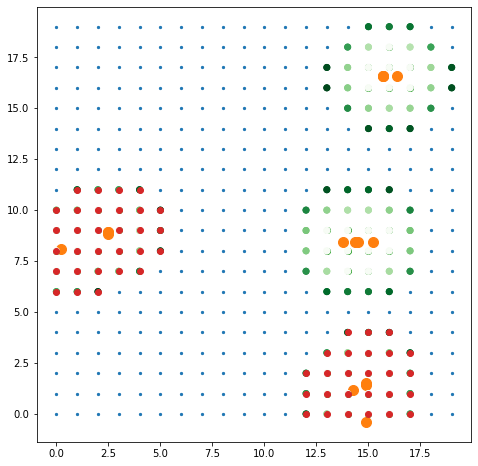

In [245]:
plt.scatter(grid[0], grid[1], s=5)
# plt.scatter(grid[0], grid[1], s=5, c=labels_cleaned)
plt.scatter(crds[:, 0], crds[:, 1], s=100)
plt.scatter(crd_around[:, 0], crd_around[:, 1])
plt.scatter(crd_around_halo[:, 0], crd_around_halo[:, 1], c=crd_around_halo_vals, cmap='Greens')
mask_val_sele = (mask_values > 0)
plt.scatter(grid[0, mask_val_sele], grid[1, mask_val_sele], c=mask_values[mask_val_sele], cmap='Greens')
# # # plt.scatter(crd_around[:, 0], crd_around[:, 1], c=labels)
plt.scatter(crd_around_cleaned[:, 0], crd_around_cleaned[:, 1])
plt.gca().set_box_aspect(1)
plt.gcf().set_size_inches(8, 8)


In [85]:
labels_ = torch.randint(2, (3,3))
labels_

tensor([[0, 1, 1],
        [0, 1, 1],
        [1, 1, 0]])

In [86]:
labels_ = labels_.view(-1) + 3

tensor([0, 1, 1, 0, 1, 1, 1, 1, 0])